In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [52]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [53]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [54]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [55]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [56]:
# View all of the classes that automap found
Base.classes.keys()



['measurement', 'station']

In [57]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [58]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [59]:
# Find the most recent date in the data set.
#most_recent_date = session.query
most_recent_date = (session.query(Measurement.date)
               .order_by(Measurement.date.desc())
               .first())
most_recent_date


('2017-08-23',)

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date ver.1:", first_date)

Query Date ver.1: 2016-08-23


In [61]:
# Calculate the date one year from the last date in data set.
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date ver2:', year_ago_date)

Query Date ver2: 2016-08-22


In [62]:
# Perform a query to retrieve the data and precipitation scores
last_12=(session.query(Measurement.date,func.max(Measurement.prcp))
                .filter(func.strftime('%Y-%m-%d',Measurement.date) > first_date)
                .group_by(Measurement.date)
                .all())

last_12

[('2016-08-24', 57.9),
 ('2016-08-25', 5.3),
 ('2016-08-26', 1.0),
 ('2016-08-27', 4.6),
 ('2016-08-28', 52.6),
 ('2016-08-29', 22.9),
 ('2016-08-30', 1.3),
 ('2016-08-31', 62.5),
 ('2016-09-01', 0.5),
 ('2016-09-02', 4.8),
 ('2016-09-03', 25.4),
 ('2016-09-04', 18.8),
 ('2016-09-05', 4.6),
 ('2016-09-06', 25.4),
 ('2016-09-07', 34.3),
 ('2016-09-08', 5.6),
 ('2016-09-09', 8.9),
 ('2016-09-10', 29.5),
 ('2016-09-11', 15.2),
 ('2016-09-12', 26.4),
 ('2016-09-13', 30.5),
 ('2016-09-14', 170.2),
 ('2016-09-15', 85.1),
 ('2016-09-16', 15.5),
 ('2016-09-17', 9.1),
 ('2016-09-18', 10.7),
 ('2016-09-19', 6.4),
 ('2016-09-20', 10.9),
 ('2016-09-21', 25.9),
 ('2016-09-22', 19.0),
 ('2016-09-23', 23.9),
 ('2016-09-24', 6.9),
 ('2016-09-25', 1.0),
 ('2016-09-26', 25.9),
 ('2016-09-27', 25.4),
 ('2016-09-28', 2.0),
 ('2016-09-29', 37.8),
 ('2016-09-30', 9.7),
 ('2016-10-01', 25.9),
 ('2016-10-02', 15.5),
 ('2016-10-03', 11.7),
 ('2016-10-04', 87.9),
 ('2016-10-05', 20.6),
 ('2016-10-06', 1.8),
 ('

In [63]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12, columns=['date','precipitation'])
df.set_index('date',  inplace=True)

In [64]:
# Sort the dataframe by date
df = df.sort_values(by='date')


<Axes: xlabel='Date', ylabel='Inches'>

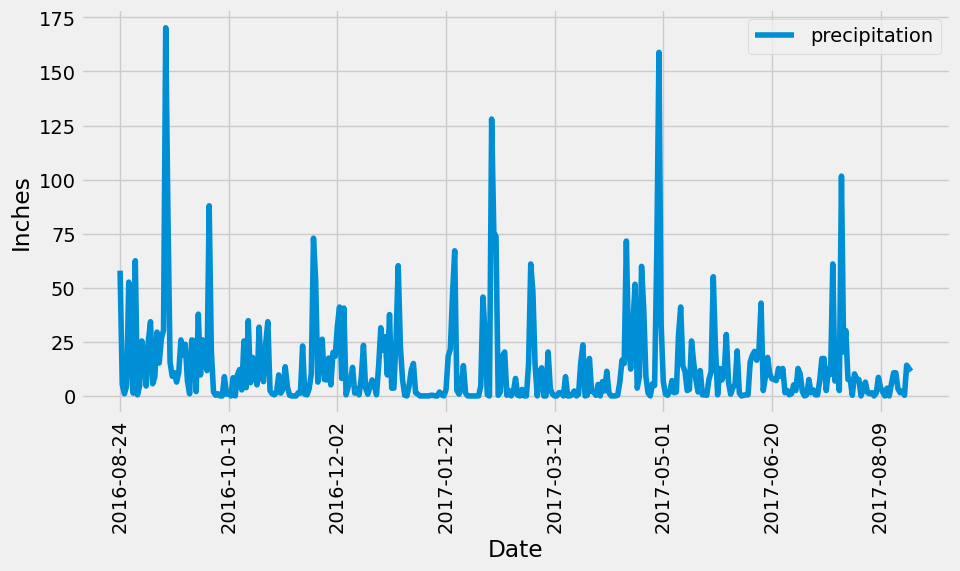

In [65]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, xlabel = 'Date', ylabel='Inches', figsize=(10,5))

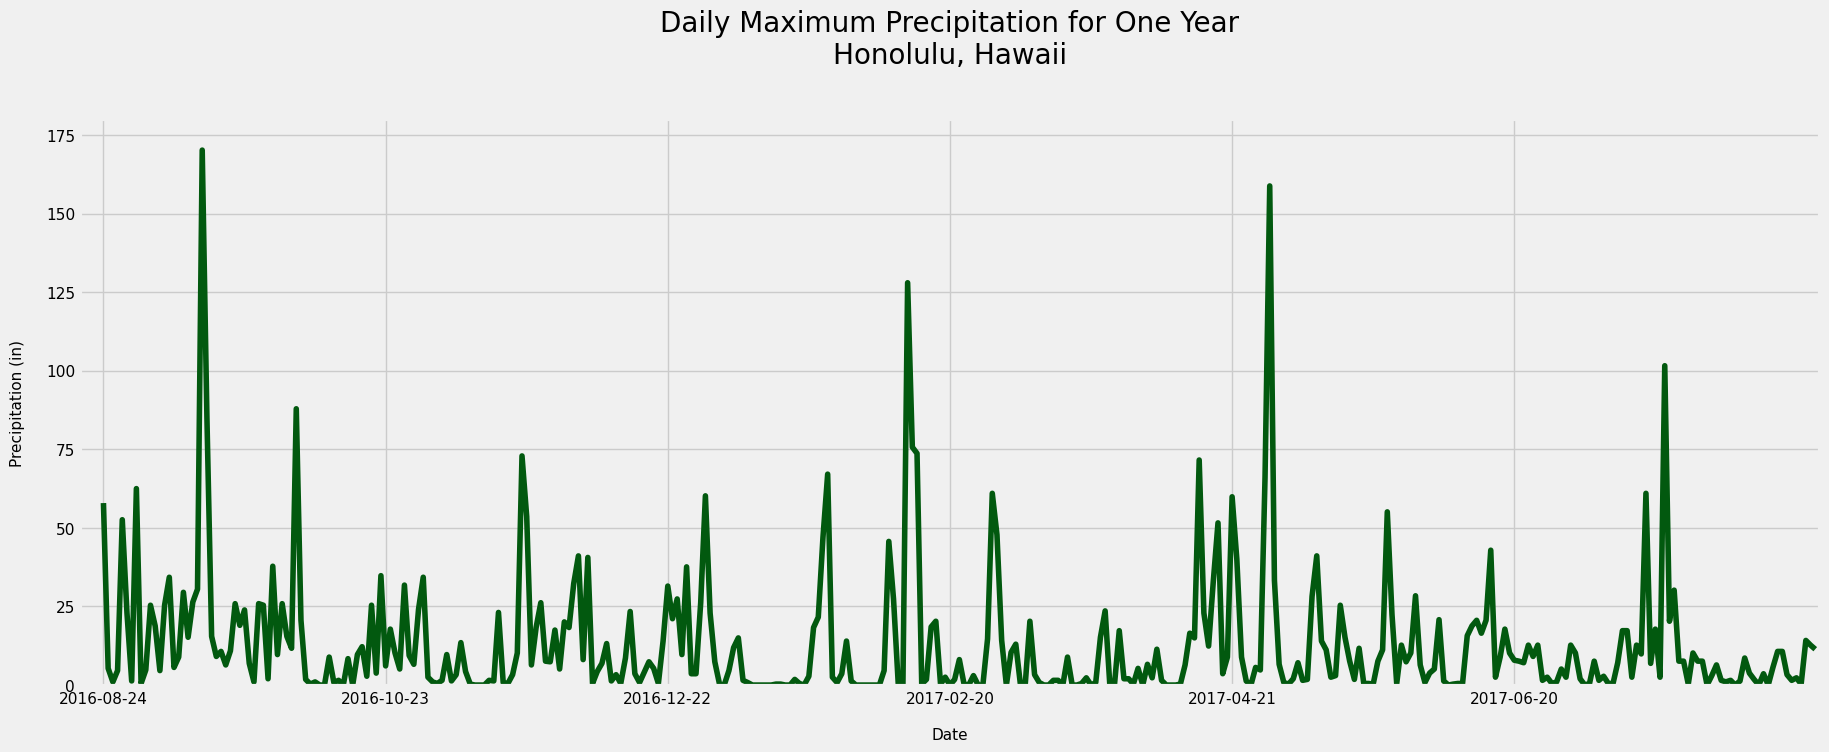

In [66]:
# Use Pandas Plotting with Matplotlib to plot the data
#pritty way, I like green color
plt.rcParams['figure.figsize']=(20,7)
df.plot(linewidth=4,alpha=1,rot=0, 
             xticks=(0,60,120,180,240,300,365),
             color='xkcd:deep green')

plt.xlim(-5,365)
plt.ylim(-0.4,180)
plt.yticks(size=11)
plt.xticks(fontsize=11)
plt.legend('',frameon=False)
plt.xlabel('Date',fontsize=11,color='black',labelpad=15)
plt.ylabel('Precipitation (in)',fontsize=11,color='black',labelpad=15)
plt.title('Daily Maximum Precipitation for One Year\nHonolulu, Hawaii',fontsize=20,pad=40)

plt.show()


In [67]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,365.000000
mean,13.143288
std,21.062054
min,0.000000
25%,1.000000
50%,6.400000
75%,16.500000
max,170.200000


# Exploratory Station Analysis

In [68]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(Station).count()
print(f'There are {total_stations} stations at Honolulu, Hawaii.')


There are 9 stations at Honolulu, Hawaii.


In [69]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs=[Measurement.station, 
             func.min(Measurement.tobs), 
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]

most_active_st=(session.query(*tobs)
                       .filter(Measurement.station=='USC00519281')
                       .all())
most_active_st
most_active_st_temp=pd.DataFrame(most_active_st, columns=['station', 'min_temp', 
                                                          'max_temp', 'avg_temp'])
most_active_st_temp.set_index('station', inplace=True)
most_active_st_temp

,min_temp,max_temp,avg_temp
station,,,
USC00519281,12.2,29.4,22.035823


In [71]:
# Using the most active station id from the previous query,
# calculate the lowest, highest, and average temperature.
# without dataframe
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 0, 'Temperature')

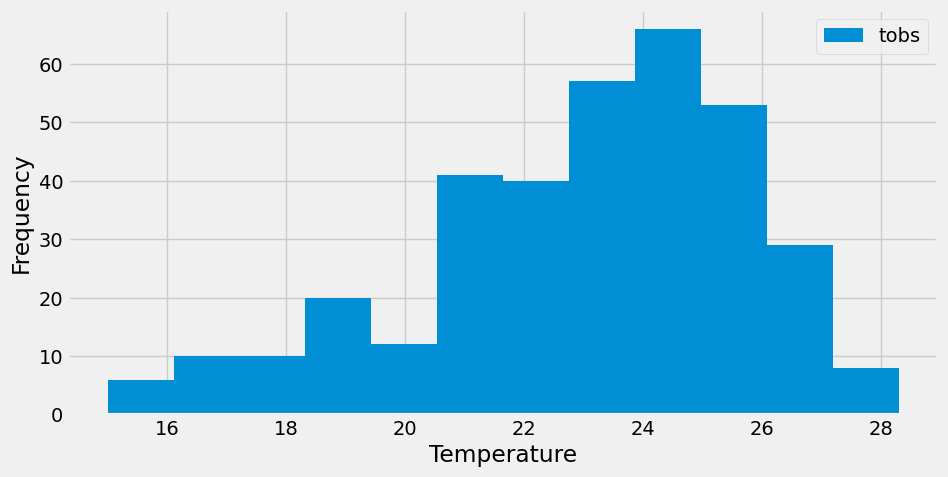

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= first_date).all()
station_df = pd.DataFrame(data, columns=['tobs'])

station_df.plot.hist(bins=12, figsize=(10, 5))
plt.xlabel('Temperature')

In [73]:
# Using the most active station id
#Temperature obs between Aug 2016 and Aug 2017 at USC00519281 Station

year_tobs=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > year_ago_date)
                  .filter(Measurement.station=='USC00519281')
                  .all())
year_tobs
#Save the query results to a Pandas DataFrame 
tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)
tobs_df.head(7)

,tobs
date,
2016-08-23,25.0
2016-08-24,25.0
2016-08-25,26.7
2016-08-26,26.7
2016-08-27,23.9
2016-08-28,22.8
2016-08-29,25.6


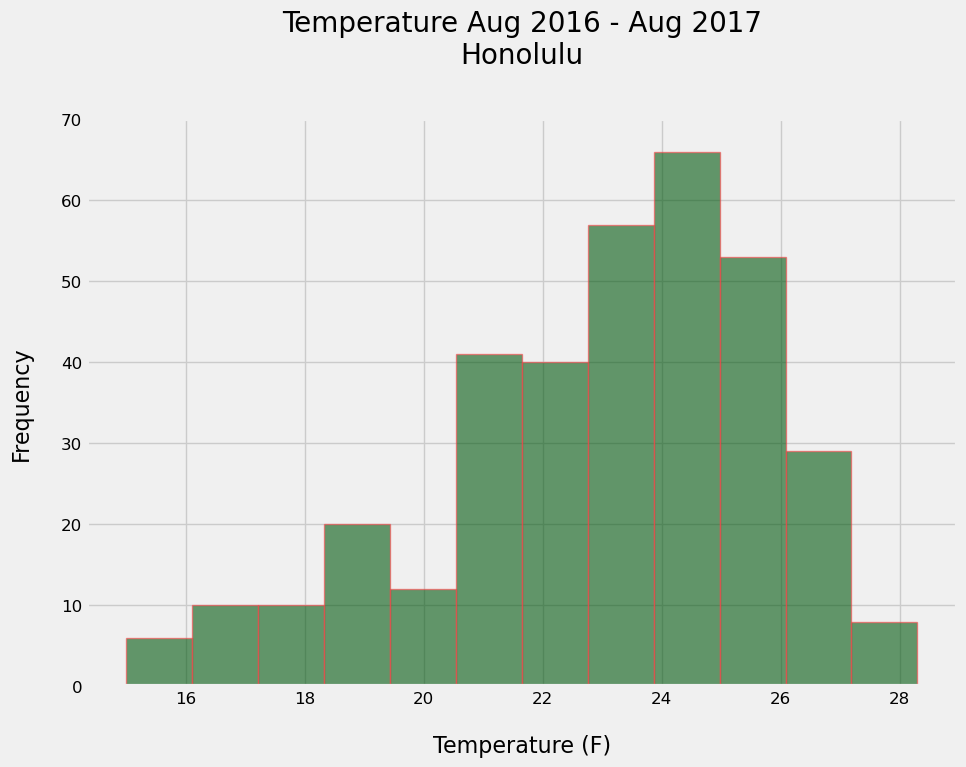

In [74]:
#Plot a histogram with bins=12 for the last year of data using tobs as the column to count
#Plotting Histogram. Pritty way, I like the green color!
plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light red',
         linewidth=1,color='xkcd:deep green')

plt.title('Temperature Aug 2016 - Aug 2017\nHonolulu',fontsize=20,pad=40)
plt.xlabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=16,color='black',labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

plt.show()

# Close Session

In [75]:
# Close Session
session.close()